# Grade: /100 pts

# Assignment 7: Tree-based methods

In this assignment you'll study tree methods. You will use a dataset that contains the premier league matches of soccer between 2010 and 2021. The data has the following variables:

|#|Attribute|Description|
|---|---|---|
|0|home_team|home team|
|1|away_team|away team|
|2|result_full|match result|
|3|home_clearances|home team clearances in the match|
|4|home_corners|home team corners in the match|
|5|home_fouls_conceded|home team fouls conceded in the match|
|6|home_offsides|home team offsides in the match|
|7|home_passes|home team passes in the match|
|8|home_possession|home team possession in the match|
|9|home_red_cards|home team red cards in the match|
|10|home_shots|home team shots in the match|
|11|home_shots_on_target|home team shots on target in the match|
|12|home_tackles|home team tackles in the match|
|13|home_touches|home team touches in the match|
|14|home_yellow_cards|home team yellow cards in the match|
|15|away_clearances|away tem clearances in the match|
|16|away_corners|away team corners in the match|
|17|away_fouls_concedevd|away team fouls conceded in the match|
|18|away_offsides|away team offsides in the match|
|19|away_passes|away team passes in the match|
|20|away_possession|away team possession in the match|
|21|away_red_cards|away team red cards in the match|
|22|away_shots|away team shots in the match|
|23|away_shots_on_target|away team shots on target in the match|
|24|away_tackles|away team tackles in the match|
|25|away_touches|away team touches in the match|
|26|away_yellow_cards|away team yellow cards in the match|
|27|clearances_avg_home|average home team clearances in the season; accumulated until the last match|
|28|corners_avg_home|average home team corners in the season; accumulated until the last match|
|29|fouls_conceded_avg_home|average home team fouls conceded in the season; accumulated until the last match|
|30|offsides_avg_home|average home team offsides in the season; accumulated until the last match|
|31|passes_avg_home|average home team passes in the season; accumulated until the last match|
|32|possession_avg_home|average home team possession in the season; accumulated until the last match|
|33|red_cards_avg_home|average home team red cards in the season; accumulated until the last match|
|34|shots_on_target_avg_home|average home team shots on target in the season; accumulated until the last match|
|35|tackles_avg_home|average home team tackles in the season; accumulated until the last match|
|36|touches_avg_home|average home team touches in the season; accumulated until the last match|
|37|yellow_cards_avg_home|average home team yellow cards in the season; accumulated until the last match|
|38|goals_scored_ft_avg_home|average home team goals scored in the season; accumulated until the last match|
|39|goals_conced_ft_avg_home|average home team goals conceded in the season; accumulated until the last match|
|40|sg_match_ft_acum_home|goals difference in the season; accumulated until the last match|
|41|goals_scored_ht_avg_home|average home team goals scored in 1st time in the season; accumulated until the last match|
|42|goals_conced_ht_avg_home|average home team goals conceded in 1st time in the season; accumulated until the last match|
|43|clearances_avg_away|average away team clearances in the season; accumulated until the last match|
|44|corners_avg_away|average away team corners in the season; accumulated until the last match|
|45|fouls_conceded_avg_away|average away team fouls conceded in the season; accumulated until the last match|
|46|offsides_avg_away|average away team offsides in the season; accumulated until the last match|
|47|passes_avg_away|average away team passes in the season; accumulated until the last match|
|48|possession_avg_away|average away team possession in the season; accumulated until the last match|
|49|red_cards_avg_away|average away team red cards in the season; accumulated until the last match|
|50|shots_on_target_avg_away|average away team shots on target in the season; accumulated until the last match|
|51|tackles_avg_away|average away team tackles in the season; accumulated until the last match|
|52|touches_avg_away|average away team touches in the season; accumulated until the last match|
|53|yellow_cards_avg_away|average away team yellow cards in the season; accumulated until the last match|
|54|goals_scored_ft_avg_away|average away team goals scored in the season; accumulated until the last match|
|55|goals_conced_ft_avg_away|average away team goals conceded in the season; accumulated until the last match|
|56|sg_match_ft_acum_away|goals difference in the season; accumulated until the last match|
|57|goals_scored_ht_avg_away|average away team goals scored in 1st time in the season; accumulated until the last match|
|58|goals_conced_ht_avg_away|average away team goals conceded in 1st time in the season; accumulated until the last match|

*Do not forget to label axes in your figures.*

*Take advantage of the flag `n_jobs=-1` where applicable.*

**Points will be deducted if a variable has a different name than the name specified by a question, where applicable.**

# Some extra clarifications:

With this dataset, we aim to predict the outcome of the game. "0" if the home team won, "1" if the away team won, and "2" if the teams finished in a draw.

- Because we want to predict the outcome of the game, we cannot use the variables that were/are produced during the game, like passes, yellow and red cards etc. So, Q1.1 will asks you to drop those kinds of variables.

- To get the outcome class of each game, you need to use the result of the game (*i.e.*, the number of home goals minus the number of away goals) to identify who won the game or whether it was a draw (tie). To do this you need to transform the result column to get the home and away goals to compare. After you do that, those columns created in this step are no longer necessary and you will only keep the outcome of the game (0 if home won, 1 if away won, and 2 in case of a draw). So Q1.2 asks you to remove those columns (like home and away goals).

- Usually, we don’t want to include in the model highly correlated features (with pairwise Pearson correlation coefficient, for example, greater than 0.9) because they give the same information (redundancy). So in Q1.3, you need to identify those features that are highly correlated and drop one of them from the original data frame. For example, if features x1 and x2 are highly correlated you should drop either x1 or x2, or, combine them into a new feature. In this assignment, we are taking the former approach, keeping the ones that have a relation with "possession".

### <span style="color:yellow"> Global Toolbox </span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as sk
from sklearn.model_selection import  train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

import warnings; warnings.filterwarnings('ignore')
seed = 310
np.random.seed(seed)

### Q1.1 - <span style="color:red">[4]</span> - Load and clean the dataset:

1. Load the dataset.
2. Drop all the variables that you would not have known prior to the match, except for the goals.
3. Store the shape of the dataframe in a variable called <span style="color:pink">**shape_vector**</span>.

In [2]:
#

df = pd.read_csv('PL_matches.csv')

df = df.drop(df.iloc[:, 3:27], axis=1)

shape_vector = df.shape

### Q1.2 - <span style="color:red">[10]</span> - Create the target variable:

1. Create a new variable (column) in the dataset called "target", which will be the target for our classification. This variable will be "0" if the home team scored more goals than away team, "1" if the away scored more, and "2" if they scored the same number of goals.
2. In which game was the greatest goal difference? What was the result of the game? Store the home team of the game in **home_team**, away in **away_team** and result in **game_result**.
3. Drop all variables related to the  result of the game including the name of the teams, except for the target.
4. **Written question:** Is this dataset balanced? Why? Write no more than 2 lines.

**Hint:** To create the target variable you **must** make use of the methods `pandas.Series.str.split` (documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html)) and `pandas.DataFrame.apply` (documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)).

In [3]:
#

def result_finder(result):
    home = result[0]
    away = result[1]
    
    if home > away:
        return 0
    if home < away:
        return 1
    else:
        return 2
    
goals = df['result_full'].str.split('-')

target = goals.apply(result_finder)

df['target'] = target

diffs = goals.apply(lambda x : abs(int(x[1]) - int(x[0])))

max_idx = diffs.idxmax(0)

home_team = df.iloc[max_idx]['home_team']
away_team = df.iloc[max_idx]['away_team']
game_result = df.iloc[max_idx]['result_full']

df = df.drop(df.iloc[:, 0:3], axis=1)

df['target'].value_counts()

target
0    1795
1    1189
2     973
Name: count, dtype: int64

**Written answer:**

No, the dataset is not balanced, as the proportion of each value in the dataset is not approximaetly equal.

### Q1.3 - <span style="color:red">[4]</span> - Correlation:

- Compute pairwise Pearson correlation coefficient (PCC) of columns and report only those with pairwise correlation absolute value greater than 0.9. The table below illustrates how the output of your code should look like. It is just for illustration and its number of rows (i.e., 3) is not real. (We are checking pairwise correlations amongst the variables - and not each variable with respect to target.)

|Index|Variable 1|Variable 2|PCC|
|---|---|---|---|
|137|passes_avg_home|possession_avg_home|0.935083|
|...|...|...|...|
|...|...|...|...|

  
- **Written question:** Using common sense and your understanding of the attributes, can you tell why are these variables correlated? Write no more than 5 sentences.

- In the pairwise PCCs, identify those variables without the term "possession" in their names and drop them from the dataframe.


In [4]:
corrs = df.corr().abs()

xs = []
ys = []
vals = []

for index, row in corrs.iterrows():
    for col in corrs.columns:
        if 1 > row[col] > 0.9 and col not in xs:
            xs.append(index)
            ys.append(col)
            vals.append(row[col])
ans = pd.DataFrame()
ans['Variable 1'] = xs
ans['Variable 2'] = ys
ans['PCC'] = vals
    
ans

,Variable 1,Variable 2,PCC
0,passes_avg_home,possession_avg_home,0.935083
1,passes_avg_home,touches_avg_home,0.990809
2,possession_avg_home,touches_avg_home,0.950461
3,passes_avg_away,possession_avg_away,0.934452
4,passes_avg_away,touches_avg_away,0.990702
5,possession_avg_away,touches_avg_away,0.949458


**Written answer:**

The highest correlation is between passes, possessions and touches. This makes sense - passes and touches are an indicator of possession, and vice versa. If a team has possession, chances are they will make a pass or several touches. Similarly, passes and touches should be correlated with posession.

In [5]:
#

var1 = ans['Variable 1'].unique() 
var2 = ans['Variable 2'].unique()

for v in var1:
    if 'possession' not in v:
        df.drop(v, axis=1, inplace=True)
for v in var2:
    if 'possession' not in v:
        df.drop(v, axis=1, inplace=True)

### Q2.1 - <span style="color:red">[35]</span> - Random Forest
- Separate the data into X and y, X should have the predictors and y the target

- Create train and test set with 30% of the data in the test set. Use the provided random seed.

- Instantiate three [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.get_params) each with a different method of selection for argument ```max_features```, *i.e.*, "sqrt", "log2", "None". Train them in a `for` loop with the number of trees in the range of 3 to 263 inclusive with step size of 20. Then, plot their OOB scores against number of trees in the forest for each classifier. Which selection method yields a better generalization score?

- Obtain the accuracy and the confusion matrix of the model with the best OOB rate. Store the accuracy in a variable called **accuracy1**.

- Visualize one arbitrary tree from one of the forests.

- **Written question:** Is this a good model? Write no more than 5 sentences.

**Use `random_state=seed` in all methods/functions accepting this argument.**

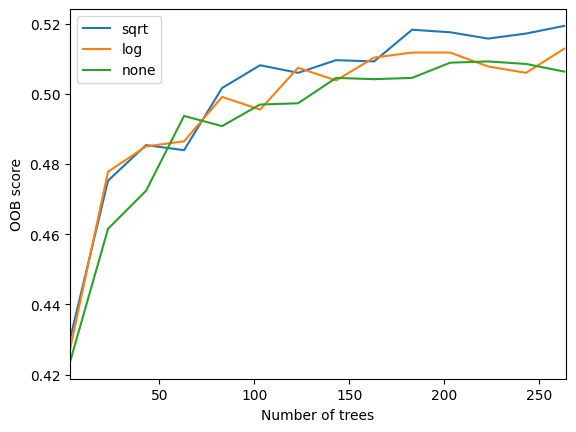

The sqrt method seems to obtain the best OOB scores, as shown on the graph.
The accuracy of this model is 0.5193602693602694, and the confusion matrix is shown below.


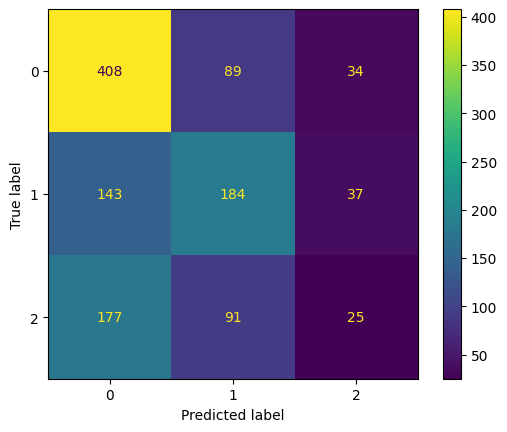

A tree is visualized below.


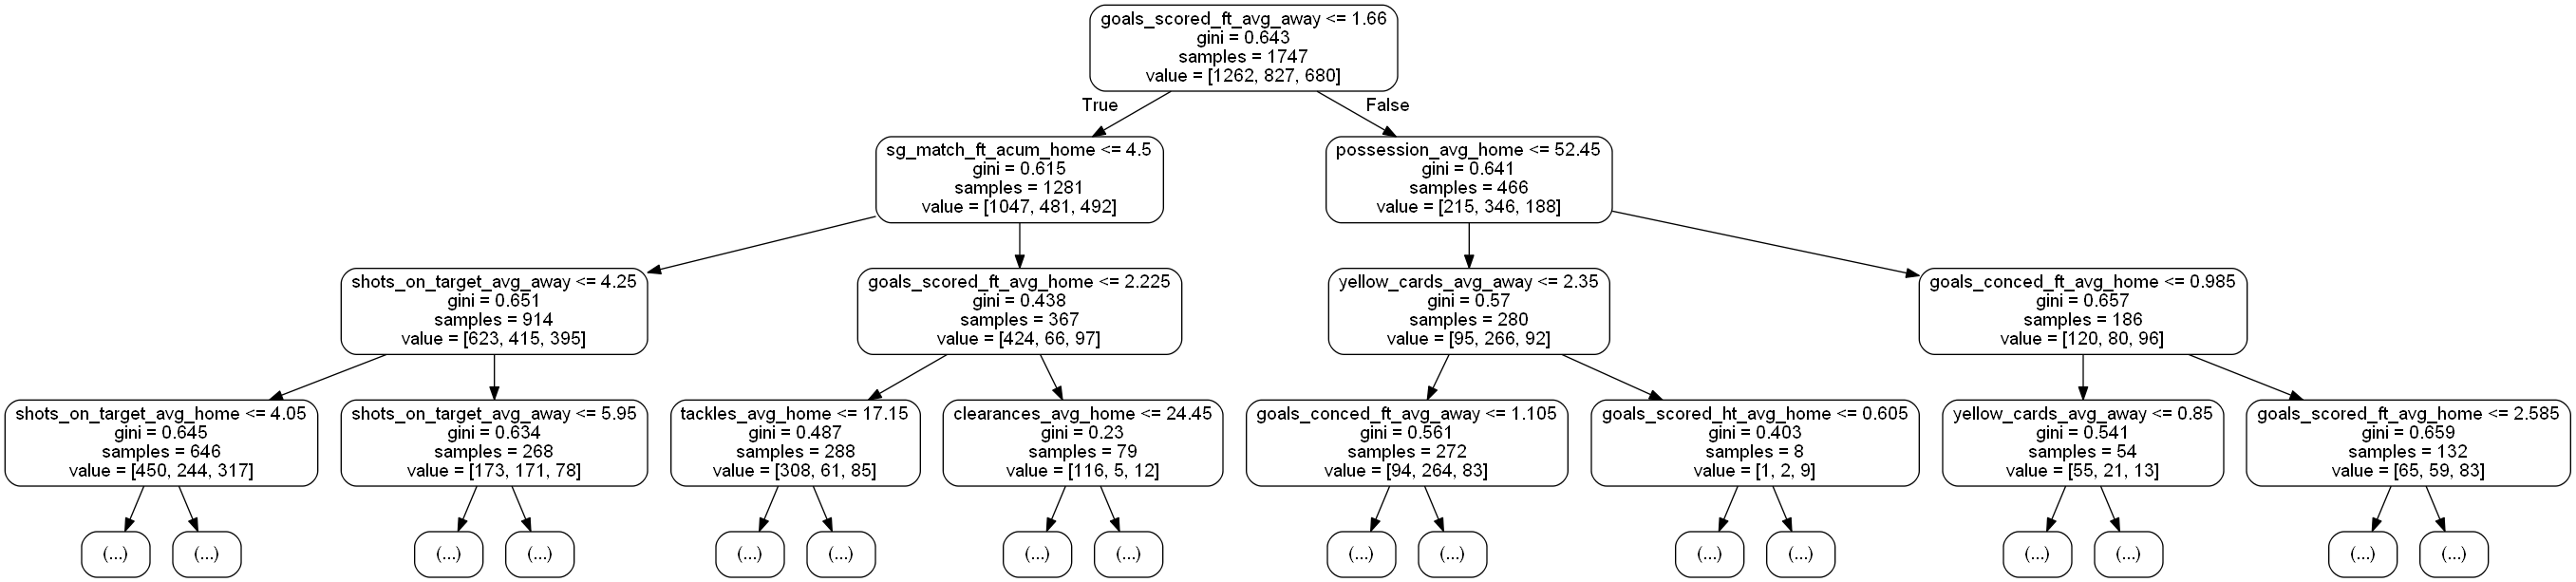

In [10]:
#
from sklearn.ensemble import RandomForestClassifier

X = df.drop('target', axis=1)
y = df['target']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = seed)

models = [
    RandomForestClassifier(n_jobs=-1, max_features='sqrt', oob_score=True, random_state = seed),
    RandomForestClassifier(n_jobs=-1, max_features='log2', oob_score=True, random_state = seed),
    RandomForestClassifier(n_jobs=-1, max_features=None, oob_score=True, random_state = seed)
]

oobs = {'sqrt' : [], 'log' : [], 'none' : []}
n_estims = {'sqrt' : [], 'log' : [], 'none' : []}

for i in range(3, 264, 20):
    for m in models:
        m.set_params(n_estimators=i)
        m.fit(Xtrain, ytrain)
        
        oob = m.oob_score_
        
        if m.max_features == 'sqrt':
            oobs['sqrt'].append(oob)
            n_estims['sqrt'].append(i)
        elif m.max_features == 'log2':
            oobs['log'].append(oob)
            n_estims['log'].append(i)
        else:
            oobs['none'].append(oob)
            n_estims['none'].append(i)

for k in oobs.keys():
    x_vals = n_estims[k]
    y_vals = oobs[k]
    
    plt.plot(x_vals, y_vals, label=k)

plt.xlim(3, 264)
plt.xlabel("Number of trees")
plt.ylabel("OOB score")
plt.legend()

plt.show()

print('The sqrt method seems to obtain the best OOB scores, as shown on the graph.')

y_pred = models[0].predict(Xtest)

accuracy1 = accuracy_score(ytest, y_pred)

print(f'The accuracy of this model is {accuracy1}, and the confusion matrix is shown below.')

confusion_mat = confusion_matrix(ytest, y_pred, labels = models[0].classes_)

display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = models[0].classes_)

display.plot()

plt.show()

print('A tree is visualized below.')

dot_data = export_graphviz(models[0].estimators_[0], out_file=None, rounded = True, max_depth=3, feature_names = Xtrain.columns)

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

**Written answer:**

This model is not great, with an accuracy of approximately 52%. That said, this is better than any baseline accuracy we could obtain. 

### Q2.2 - <span style="color:red">[15]</span> - Create a barplot reporting feature importance for the best model (found in Q2.1). For this purpose, instead of using mean decrease in impurity as the metric to calculate the importance scores, we want to use the permutation importance algorithm (check out the [documentation](https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance)). Because, impurity-based feature importances can be misleading for high cardinality features (many unique values), but permutation feature importances do not have a bias toward high-cardinality features and can be computed on a left-out test set. The x-axis of your barplot should reflect the features' names and the y-axis their mean accuracy decrease. Each bar must also show its error bar. According to this barpot, what are the 3 most important features?

Use [`sklearn.inspection.permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance) with `n_repeats=10` (because the computation for full permutation importance is very costly, so let's limit it).

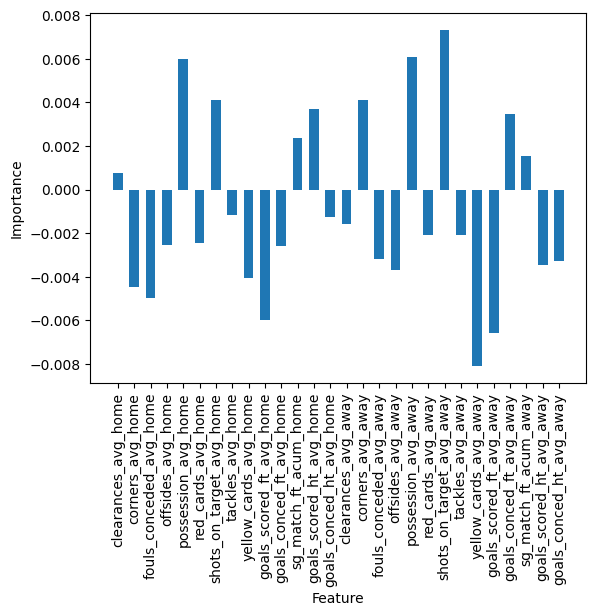

In [11]:
#

from sklearn.inspection import permutation_importance

# From the documentation

r = permutation_importance(models[0], Xtest, ytest,
                                 n_repeats=10,
                                 random_state=seed)

means = r.importances_mean

plt.bar(Xtrain.columns, means, width=0.6)

plt.xlabel('Feature')
plt.ylabel('Importance')

plt.xticks(rotation=90)

plt.show()

**Written answer:** 

The three most important features are shots_on_target_avg_away, possession_avg_home and possession_avg_away.

### Q3.1 - <span style="color:red">[20]</span> - XGBoosting
Now, we'll repeat the process for the XGB model, using an [```XGBClassifier``` object](https://xgboost.readthedocs.io/en/latest/python/python_api.html).

1. Use cross-validated grid search (with 5 stratified validation sets) to find the best values from the lists below for `XGBClassifier`. Use only 40% of the training set for your search, otherwise it will take a long time. Take advantage of `n_jobs=-1`. Report the optimal values found per argument.
 - Number of trees: [100, 150, 200]
 - Maximum depth: [8, 25, 42]
 - Learning rate: [0.1, 0.5, 0.9]

2. Train a `XGBClassifier` using the optimal values and report its accuracy as well as the confusion matrix. Store the accuracy in a variable called **accuracy2**.
3. Compare the confusion matrix and the accuracy of this model with the previous one. Is the performance of XGBoost better than the RandomForestClassifier?

**Use `random_state=seed` in all methods accepting this argument.**

In [12]:
#

from xgboost import XGBClassifier

#Define the classifier.

# From Lab 7

XGB_Target = XGBClassifier(max_depth=3,                 
                            learning_rate=0.1,            # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=100,             # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=-1,                    # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,              # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            scale_pos_weight=950.0/539.0, # Control the balance of positive and negative weights, useful for imbalanced classes.
                                                          # sum(negative instances) / sum(positive instances)
                            base_score=0.5,               # The initial prediction score of all instances, global bias. Set to average of the target rate.
                            random_state=seed             # Seed
                            )

param_grid = dict({'n_estimators'  : [100, 150, 200],
                   'max_depth'     : [8, 25, 42],
                   'learning_rate' : [0.1, 0.5, 0.9]
                  })

subset = Xtrain.sample(frac = 0.4, random_state=seed)
subset_target = ytrain.sample(frac = 0.4, random_state = seed)

cvs = StratifiedKFold(n_splits = 5)

GridXGB = GridSearchCV(XGB_Target,        
                       param_grid,          # Parameter grid
                       cv = cvs,      # Cross-validation object.  
                       scoring = 'roc_auc', # How to rank outputs.
                       n_jobs = -1,          # Parallel jobs. -1 is "all you have"
                       refit = False,       # If refit at the end with the best. We'll do it manually.
                       verbose = 1          # If to show what it is doing.
                      )

GridXGB.fit(subset.iloc[:, :-1], subset_target)

GridXGB.best_params_

Fitting 5 folds for each of 27 candidates, totalling 135 fits


{'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 100}

The accuracy of this model is 0.49158249158249157, and the confusion matrix is shown below.


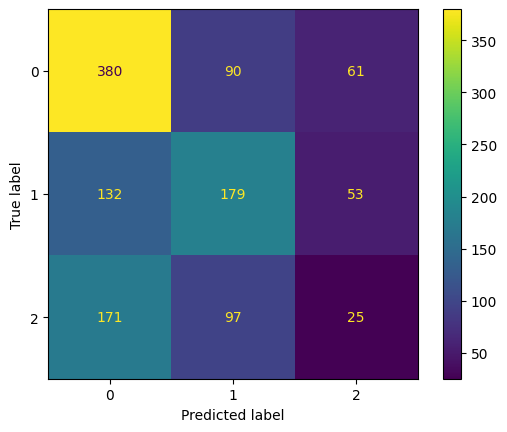

In [13]:
# From Lab 7

md = GridXGB.best_params_.get('max_depth')
lr = GridXGB.best_params_.get('learning_rate')
ne = GridXGB.best_params_.get('n_estimators')

XGB_Target = XGBClassifier(max_depth=md, # Depth of each tree
                            learning_rate=lr, # How much to shrink error in each subsequent training. Trade-off with no. estimators.
                            n_estimators=ne, # How many trees to use, the more the better, but decrease learning rate if many used.
                            verbosity=1,                  # If to show more errors or not.
                            objective='binary:logistic',  # Type of target variable.
                            booster='gbtree',             # What to boost. Trees in this case.
                            n_jobs=4,                     # Parallel jobs to run. Set your processor number.
                            gamma=0.001,                  # Minimum loss reduction required to make a further partition on a leaf node of the tree. (Controls growth!)
                            subsample=0.632,                  # Subsample ratio. Can set lower
                            colsample_bytree=1,           # Subsample ratio of columns when constructing each tree.
                            colsample_bylevel=1,          # Subsample ratio of columns when constructing each level. 0.33 is similar to random forest.
                            colsample_bynode=1,           # Subsample ratio of columns when constructing each split.
                            reg_alpha=1,                  # Regularizer for first fit. alpha = 1, lambda = 0 is LASSO.
                            reg_lambda=0,                 # Regularizer for first fit.
                            scale_pos_weight=1,           # Balancing of positive and negative weights.
                            base_score=0.5,               # Global bias. Set to average of the target rate.
                            random_state=seed
                            )

XGB_Target.fit(Xtrain, ytrain)

y_pred = XGB_Target.predict(Xtest)

accuracy2 = accuracy_score(ytest, y_pred)

print(f'The accuracy of this model is {accuracy2}, and the confusion matrix is shown below.')

confusion_mat = confusion_matrix(ytest, y_pred, labels = XGB_Target.classes_)

display = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = XGB_Target.classes_)

display.plot()

plt.show()

**Written answer:**

Looking at the diagonal entries of the confusion matrices (that is, when the classifier predicts correctly), we can see that XGBoost made fewer correct predictions than Random Forest. So, Random Forest is better. This is also reflected in the lower accuracy of the XGBoost model.

### Q3.2 - <span style="color:red">[4]</span> - **Written question:** How would you improve the accuracy of the models? Write no more than 5 sentences (no code).

**Written answer:**

I would use a more robust feature selection technique. We can see that a number of features are not relevant indicators of the target variable, so we should use a feature selection technique. This would reduce noise and improve the classification, and it would also make the model less complex.

### Q3.3 - <span style="color:red">[8]</span> - Create a barplot reporting permutation feature importances for your final XGB model. What are the top 3 most important features?

Use [`sklearn.inspection.permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance) with `n_repeats=10` (because the computation for full permutation importance is very costly, so let's limit it).

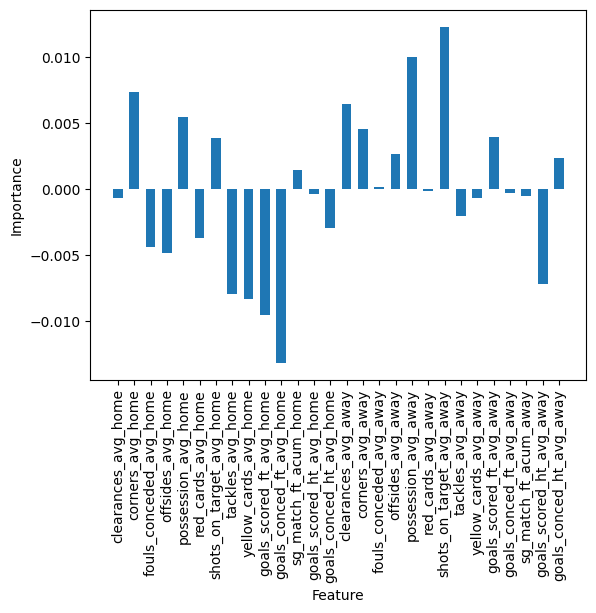

In [14]:
#

r = permutation_importance(XGB_Target, Xtest, ytest,
                                 n_repeats=10,
                                 random_state=seed)

means = r.importances_mean

plt.bar(Xtrain.columns, means, width=0.6)

plt.xlabel('Feature')
plt.ylabel('Importance')

plt.xticks(rotation=90)

plt.show()

**Written answer:** The three most important features are corners_avg_home, possession_avg_away, and shots_on_target_avg_away.